In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [27]:
df=pd.read_excel("MI_Assignment-1_Part A_Online Retail.xlsx")
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [28]:
df['Quantity']=df['Quantity'].abs()

In [29]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [30]:
# customers who have made a transaction between 1stDec 2010 to 31stAug 2011. 
xt=df[(df['InvoiceDate']>='2010-12-01') & (df['InvoiceDate']<='2011-08-31')]
xt

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
319395,564852,82552,WASHROOM METAL SIGN,10,2011-08-30 17:23:00,1.45,14976.0,United Kingdom
319396,564852,21756,BATH BUILDING BLOCK WORD,3,2011-08-30 17:23:00,5.95,14976.0,United Kingdom
319397,564852,21908,CHOCOLATE THIS WAY METAL SIGN,7,2011-08-30 17:23:00,2.10,14976.0,United Kingdom
319398,564852,22116,METAL SIGN HIS DINNER IS SERVED,10,2011-08-30 17:23:00,0.79,14976.0,United Kingdom


c:\Users\Daniel christopher\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CustomerID'>

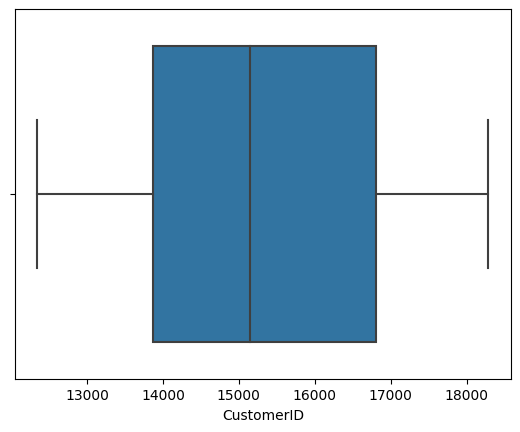

In [31]:
sns.boxplot(xt['CustomerID'])
#No outliers

In [32]:
xt['CustomerID'].fillna(xt['CustomerID'].mode()[0], inplace=True)
df['CustomerID'].fillna(df['CustomerID'].mode()[0], inplace=True)
#fill nan values with mode

C:\Temp\ipykernel_24992\3276894016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt['CustomerID'].fillna(xt['CustomerID'].mode()[0], inplace=True)


In [33]:
# if  customer did a transaction in the period Sep 2011 to Dec 2011
nonchurn=df[(df['InvoiceDate']>='2011-09-01') & (df['InvoiceDate']<='2011-12-01')]
nonchurn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
320705,565080,20677,PINK POLKADOT BOWL,8,2011-09-01 08:25:00,1.25,13509.0,United Kingdom
320706,565080,22128,PARTY CONES CANDY ASSORTED,24,2011-09-01 08:25:00,1.25,13509.0,United Kingdom
320707,565081,21067,NaN,1,2011-09-01 09:03:00,0.00,17841.0,United Kingdom
320708,565082,22423,REGENCY CAKESTAND 3 TIER,2,2011-09-01 09:15:00,12.75,13305.0,United Kingdom
320709,565082,15060B,FAIRY CAKE DESIGN UMBRELLA,8,2011-09-01 09:15:00,3.75,13305.0,United Kingdom
...,...,...,...,...,...,...,...,...
516379,C579886,22197,POPCORN HOLDER,1,2011-11-30 17:39:00,0.85,15676.0,United Kingdom
516380,C579886,23146,TRIPLE HOOK ANTIQUE IVORY ROSE,1,2011-11-30 17:39:00,3.29,15676.0,United Kingdom
516381,C579887,84946,ANTIQUE SILVER T-LIGHT GLASS,1,2011-11-30 17:42:00,1.25,16717.0,United Kingdom
516382,C579887,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,1,2011-11-30 17:42:00,7.95,16717.0,United Kingdom


In [34]:
 #if  customer did  not do a transaction in the period Sep 2011 to Dec 2011
churn=xt[~xt.CustomerID.isin(nonchurn.CustomerID)]
df_churn = df[~df.CustomerID.isin(nonchurn.CustomerID)]
churn

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
319367,564850,22189,CREAM HEART CARD HOLDER,2,2011-08-30 16:43:00,3.95,17298.0,United Kingdom
319368,564850,23322,LARGE WHITE HEART OF WICKER,5,2011-08-30 16:43:00,2.95,17298.0,United Kingdom
319369,564850,23323,WHITE WICKER STAR,5,2011-08-30 16:43:00,2.10,17298.0,United Kingdom
319370,564850,22158,3 HEARTS HANGING DECORATION RUSTIC,3,2011-08-30 16:43:00,2.95,17298.0,United Kingdom


In [35]:
xt['Churn'] = ""
xt.loc[xt['CustomerID'].isin(churn['CustomerID']), 'Churn'] = 1
xt.loc[xt['CustomerID'].isin(nonchurn['CustomerID']), 'Churn'] = 0
df['Churn'] = ""
df.loc[df['CustomerID'].isin(df_churn['CustomerID']), 'Churn'] = 1
df.loc[df['CustomerID'].isin(nonchurn['CustomerID']), 'Churn'] = 0
xt['Churn'].value_counts()
xt

C:\Temp\ipykernel_24992\2792737505.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xt['Churn'] = ""


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Churn
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,1
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,1
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,1
...,...,...,...,...,...,...,...,...,...
319395,564852,82552,WASHROOM METAL SIGN,10,2011-08-30 17:23:00,1.45,14976.0,United Kingdom,0
319396,564852,21756,BATH BUILDING BLOCK WORD,3,2011-08-30 17:23:00,5.95,14976.0,United Kingdom,0
319397,564852,21908,CHOCOLATE THIS WAY METAL SIGN,7,2011-08-30 17:23:00,2.10,14976.0,United Kingdom,0
319398,564852,22116,METAL SIGN HIS DINNER IS SERVED,10,2011-08-30 17:23:00,0.79,14976.0,United Kingdom,0


In [36]:
#target variable yt
Yt = xt["Churn"]
#drop all categorical variables
dtxt=xt.drop(["Churn","Description","StockCode","Country","InvoiceNo","InvoiceDate"],axis=1,inplace=True)
xt


C:\Temp\ipykernel_24992\1970658049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtxt=xt.drop(["Churn","Description","StockCode","Country","InvoiceNo","InvoiceDate"],axis=1,inplace=True)


,Quantity,UnitPrice,CustomerID
0,6,2.55,17850.0
1,6,3.39,17850.0
2,8,2.75,17850.0
3,6,3.39,17850.0
4,6,3.39,17850.0
...,...,...,...
319395,10,1.45,14976.0
319396,3,5.95,14976.0
319397,7,2.10,14976.0
319398,10,0.79,14976.0


In [37]:
Yt = Yt.astype('int64')

In [42]:
from sklearn import tree
Dt = tree.DecisionTreeClassifier(max_depth=4)
Dt = Dt.fit(xt,Yt)

In [44]:
import graphviz

dot_data = tree.export_graphviz(Dt, out_file=None,feature_names=xt.columns,  class_names="Churn",  filled=True, rounded=True,special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("Dt")

'Dt.pdf'

In [45]:
from sklearn.model_selection import  cross_val_score

In [46]:
# 10 Folds Cross Validation 
score = cross_val_score(Dt, xt, Yt, cv=10)
score

array([0.85369443, 0.85118973, 0.84987477, 0.85062617, 0.84921728,
       0.85118973, 0.84765185, 0.85572949, 0.84661866, 0.85078272])

In [47]:
score.mean()

0.8506574827802129

c:\Users\Daniel christopher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


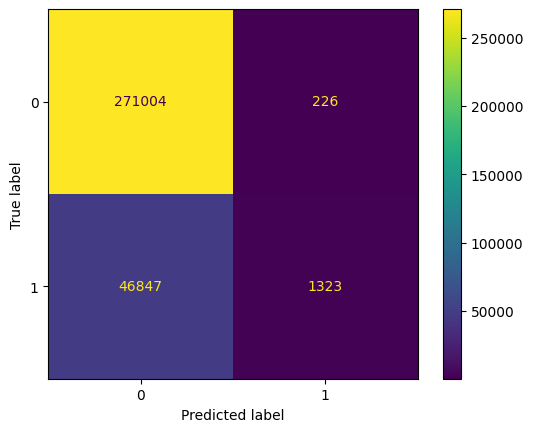

In [48]:
from sklearn.metrics import  plot_confusion_matrix
plot_confusion_matrix(Dt,xt,Yt)

Accuracy =0.852620

c:\Users\Daniel christopher\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


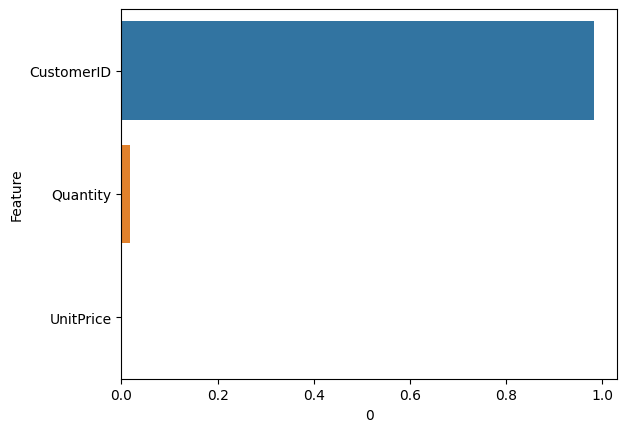

In [50]:
Rffea = pd.DataFrame(Dt.feature_importances_)
Rffea["Feature"] = list(xt) 
Rffea.sort_values(by=0, ascending=False).head()
hg = sns.barplot(0,"Feature",data = Rffea.sort_values(by=0, ascending=False)[0:5])

In [51]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

In [53]:
# Confusion Matrix
ypred = Dt.predict(xt)
prob = Dt.predict_proba(xt)
confusion_matrix(Yt, ypred)

array([[271004,    226],
       [ 46847,   1323]], dtype=int64)

In [59]:
AUC = roc_auc_score(Yt, prob[:,1])
AUC

0.7319814906283771

In [60]:
print(Yt.shape)
print(prob.shape)

(319400,)
(319400, 2)


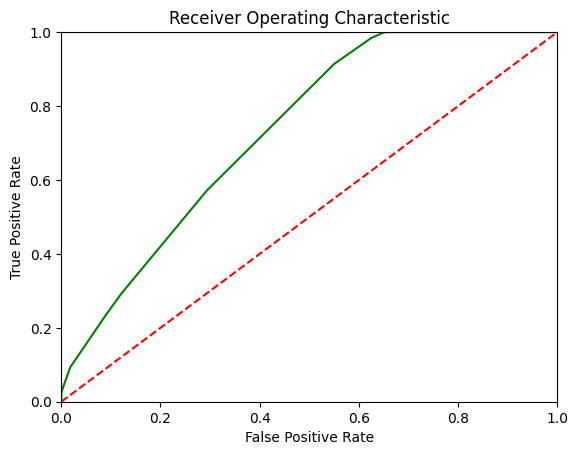

In [62]:
from sklearn.metrics import roc_curve
# Calculate the fpr and tpr for all thresholds of the classification
false_positive_rate, true_postive_rate, threshold = roc_curve(Yt, prob[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_postive_rate, 'g')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

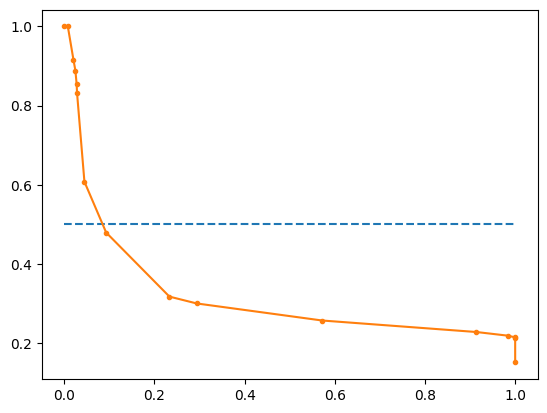

In [64]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(Yt, prob[:,1])
# plot no skill
plt.plot([0, 1], [0.5, 0.5], linestyle='--')
# plot the roc curve for the model
plt.plot(recall, precision, marker='.')

In [66]:
from sklearn import metrics
dt_accuracy=metrics.accuracy_score(Yt, ypred)

ID3 cannot be used for constructing obliqueDT 

SVM

In [71]:
df['Churn']
df['Churn'].value_counts()

0    490384
1     51525
Name: Churn, dtype: int64

In [72]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

svmt = df["Churn"]
svmt = svmt.astype('int64')

svmd = df.drop(labels = ["Churn","Description","StockCode","Country","InvoiceNo","InvoiceDate"],axis = 1,inplace=True)


In [73]:
# Split dataset into training set and test set
 # 70% training and 30% test
x_train, x_test, y_train, y_test = train_test_split(df, svmt, test_size=0.3,random_state=109)

In [84]:
from sklearn import svm
svm = svm.SVC(kernel='linear')
svm.fit(x_train, y_train)
svmypred = svm.predict(x_test)

In [85]:
svm_accuracy = accuracy_score(y_test,svmypred)

In [86]:
from sklearn import metrics
metrics.accuracy_score(y_test, svmypred)

0.9042337903587927

c:\Users\Daniel christopher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


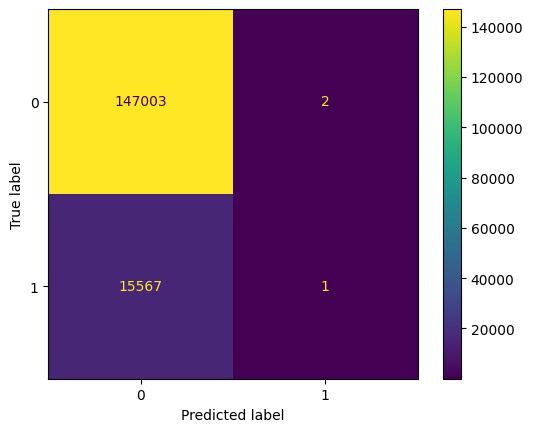

In [87]:
plot_confusion_matrix(svm,x_test,y_test)

ANN

In [76]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score 
ANN = MLPClassifier()
ANN.fit(x_train, y_train)
ann_ypred = ANN.predict(x_test)
ann_accuracy = accuracy_score(y_test,ann_ypred)

In [77]:
confusion_mat=confusion_matrix(y_test,ann_ypred)

In [78]:
confusion_mat

array([[147005,      0],
       [ 15567,      1]], dtype=int64)

In [80]:
print(ann_accuracy)

0.904246092524589


c:\Users\Daniel christopher\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


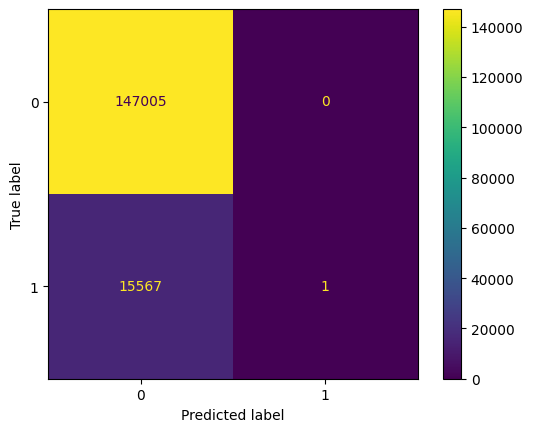

In [81]:
plot_confusion_matrix(ANN,x_test,y_test)

Decision Tree

In [68]:
from sklearn.metrics import classification_report
print("DT Accuracy:",dt_accuracy)
dt_report= classification_report(Yt,ypred)

DT Accuracy: 0.8526205385097056


In [70]:
print(dt_report)

              precision    recall  f1-score   support

           0       0.85      1.00      0.92    271230
           1       0.85      0.03      0.05     48170

    accuracy                           0.85    319400
   macro avg       0.85      0.51      0.49    319400
weighted avg       0.85      0.85      0.79    319400



SVM

In [88]:
print("SVM Accuracy:",svm_accuracy)
svm_report= classification_report(y_test,svmypred)

SVM Accuracy: 0.9042337903587927


In [89]:
print(svm_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    147005
           1       0.33      0.00      0.00     15568

    accuracy                           0.90    162573
   macro avg       0.62      0.50      0.47    162573
weighted avg       0.85      0.90      0.86    162573



ANN

In [82]:
print("ANN Accuracy:",ann_accuracy)
ann_report= classification_report(y_test,ann_ypred)

ANN Accuracy: 0.904246092524589


In [83]:
print(ann_report)

              precision    recall  f1-score   support

           0       0.90      1.00      0.95    147005
           1       1.00      0.00      0.00     15568

    accuracy                           0.90    162573
   macro avg       0.95      0.50      0.47    162573
weighted avg       0.91      0.90      0.86    162573

